## Images (matrices of pixel)

- A lot of our data comes from images
  
[Video tutorial](https://www.youtube.com/watch?v=Z78zbnLlPUA&list=PLQVvvaa0QuDdttJXlLtAJxJetJcqmqlQq)

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

## Basic opencv operations
Source: [medium tutorial](https://medium.com/@yukunpengba/comprehensive-python-opencv-tutorial-for-beginners-part-i-fd0293d52241)

#### Playing with apples
![](images/red_apple.jpeg)

<class 'numpy.ndarray'> (240, 210, 3)


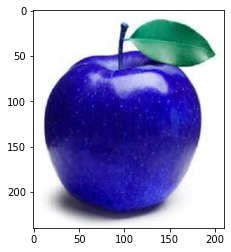

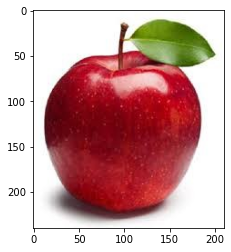

In [2]:
# Opencv uses the bgr format, while matplotlib uses rgb
img = cv2.imread('images/red_apple.jpeg')   # Read the image
print(type(img),img.shape)
plt.imshow(img)   # Ploting the image using matplotlib
plt.figure()
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)


In [3]:
# Another way to display the image and to close the window when "escape button" = key 27 is pressed

def show_image(title, img):
    cv2.imshow("image",img)
    key = cv2.waitKey(0)  # wait zero seconds
    if key == 27:
        cv2.destroyAllWindows()
show_image("Juicy apple",img)

In case you do not want to plot a picture inlined but open an external image viewer, you can use the `cv2.imshow("Image Name", img)`


## Resizing an Image

You can use various interpolation mechanisms when resizing. OpenCV is really well documented and you can find more on `cv2.resize`'s interpolation options here: http://docs.opencv.org/2.4/modules/imgproc/doc/geometric_transformations.html?highlight=resize#resize

In [4]:
def read(path, switch_channels=True):
    """Read image pixel data from file
    Args:
    path (string): path to image on disk
    switch_channels (bool): if true changes the channels from bgr to rgb (used by matplotlib)"""
    image = cv2.imread(path)
    if switch_channels:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [5]:
def resize(image, new_x_dim):
    """Reduces the amount of pixels
    Args:
    image (ndarray): the pixel cube
    nex_x_dim (int): new number of columns"""
    ratio = new_x_dim / image.shape[1]
    new_y_dim = int(image.shape[0] * ratio)
    dim = (new_x_dim, new_y_dim)
    resized_image = cv2.resize(image, dim, interpolation=cv2.INTER_AREA)
    return resized_image

In [6]:
def create_plot(image, title=''):
    plt.imshow(image, interpolation='none')
    plt.title(title)
    plt.axis('off')
    return plt

### original
<img src="./data/mare-08.jpg">

(15, 20, 3)


<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.7/site-packages/matplotlib/pyplot.py'>

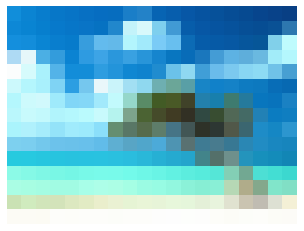

In [7]:
#image_path = './jurassic-park-tour-jeep.jpg'
image_path = './data/mare-08.jpg'

img = read(image_path)
img_small = resize(img, 20)
print(img_small.shape)
create_plot(img_small)

## Drawing shapes with opencv

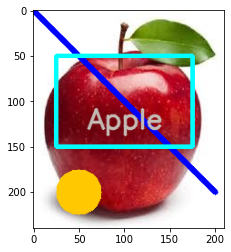

In [8]:
draw_img = img_rgb.copy()        # Make a copy of the image
cv2.line(draw_img,(0,0),(200,200),(0,0,255),5)   # Draw the line
cv2.rectangle(draw_img,(25,50),(175,150),(0,255,255),3)
cv2.circle(draw_img,(50,200), radius=25, color=(255,200,0), thickness=-1) # negative thickness makes circle filled
font = cv2.FONT_HERSHEY_SIMPLEX 
textcolor = (196,188,180)
cv2.putText(draw_img,'Apple',(60,130),font, 1,textcolor,2,cv2.LINE_AA)             
plt.imshow(draw_img)    # show the image

## Detecting Objects in an Image

#### Find the yellow ball

In [9]:
!wget -O data/selena.jpg https://i.pinimg.com/236x/e8/aa/50/e8aa50b2f8a65d30c0ef0ffe8f8dc7b0--sport-tennis-female-athletes.jpg

--2021-03-15 22:35:47--  https://i.pinimg.com/236x/e8/aa/50/e8aa50b2f8a65d30c0ef0ffe8f8dc7b0--sport-tennis-female-athletes.jpg
Resolving i.pinimg.com (i.pinimg.com)... 2.21.28.234, 2a04:4e42:47::84
Connecting to i.pinimg.com (i.pinimg.com)|2.21.28.234|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14766 (14K) [image/jpeg]
Saving to: ‘data/selena.jpg’

data/selena.jpg     100%[===================>]  14.42K  --.-KB/s    in 0s      

2021-03-15 22:35:47 (232 MB/s) - ‘data/selena.jpg’ saved [14766/14766]



In [10]:
!ls -la data/selena*

-rw-r--r-- 1 jovyan 1000 14766 Mar 15 22:35 data/selena.jpg
-rw-r--r-- 1 jovyan 1000 20359 Mar 15 22:27 data/selena-obj-detected.jpg


<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.7/site-packages/matplotlib/pyplot.py'>

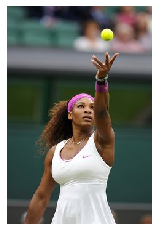

In [11]:
image_path = './data/selena.jpg'

img = read(image_path)
create_plot(img)

## Color Spaces

We have seen the RGB color space so far, where three channels contain the information about how much red, green, and blue contribute to the color of a pixel.

A disadvantage with the RGB color space is, that pixel values change quite a lot for the same color under different light conditions. (eg the sunny side of the tennis ball vs the shadow side)

Alternatives to the RGB color space are for example the HSV (Hue, Saturation, Value) color space and the LAB color space, where *L* stands for lightness and *a* and *b* for the color opponents green–red and blue–yellow.

![](https://upload.wikimedia.org/wikipedia/commons/thumb/0/00/HSV_color_solid_cone_chroma_gray.png/640px-HSV_color_solid_cone_chroma_gray.png)


![](https://upload.wikimedia.org/wikipedia/commons/thumb/0/06/CIELAB_color_space_top_view.png/497px-CIELAB_color_space_top_view.png)


Using the HSV color space, we can find for example the tennis ball quite easily. We create a mask for a certain range of color values, which are characterisitc for a tennis ball.

cv2.inRange(img,lower,higher)<class 'numpy.ndarray'> Image shape: (354, 236, 3) and mask shape: (354, 236)
 Image contains: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215


<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.7/site-packages/matplotlib/pyplot.py'>

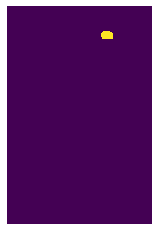

In [12]:
def create_ball_mask(image):
    """From an image create a HSV mask by identifying lower and upper bounds of the three values"""
    # Color values in HSV
    green_lower = (20, 100, 180)
    green_upper = (60, 255, 255)

    hsv_img = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
 
    mask = cv2.inRange(hsv_img, green_lower, green_upper) # inRange: exclude all pixels outside of range
    mask = cv2.dilate(mask, None, iterations=2)           # dilate: (like pupils) expand pixels around the center
    mask = cv2.erode(mask, None, iterations=2)            # erode: opposite of dilate. remove pixels from outer layer
    print(f'cv2.inRange(img,lower,higher){type(mask)} Image shape: {image.shape} and mask shape: {mask.shape}\n Image contains: {np.unique(image)}\n mask contains: {np.unique(mask)} which is good cause object to be found should be white and background should be black.')
    
    return mask
create_plot(create_ball_mask(img))

In [13]:
cv2.__version__

'4.5.1'

## Finding contours
Lets look at an image like this:
![]()


In [14]:
def mark_object(image, mask):
    """find the largest contour in the mask, then use it to compute the minimum enclosing circle and centroid"""
    # Finds contours in a binary image. The contours are a useful tool for shape analysis and object detection and recognition.
    contours = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[-2]

    c = max(contours, key=cv2.contourArea)
    ((x, y), radius) = cv2.minEnclosingCircle(c)

    # draw the circle and centroid on the frame,
    # then update the list of tracked points
    cv2.circle(image, center=(int(x), int(y)), radius=int(radius), color=(255, 0, 0), thickness=3)
    return image

In [15]:
mask = create_ball_mask(img)
img = mark_object(img, mask)
img_converted = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
cv2.imwrite('./data/selena-obj-detected.jpg', img_converted)
#cv.show()


cv2.inRange(img,lower,higher)<class 'numpy.ndarray'> Image shape: (354, 236, 3) and mask shape: (354, 236)
 Image contains: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215


True

![](./data/selena-obj-detected.jpg)

In [16]:
%%bash
wget -O data/1.jpg http://media.npr.org/assets/img/2016/12/20/ap_16281584372854-061869e770af197e85badc7147ade2f8a0ac582c-s900-c85.jpg

URL transformed to HTTPS due to an HSTS policy
--2021-03-15 22:35:48--  https://media.npr.org/assets/img/2016/12/20/ap_16281584372854-061869e770af197e85badc7147ade2f8a0ac582c-s900-c85.jpg
Resolving media.npr.org (media.npr.org)... 92.122.80.249, 2a02:26f0:116:197::1155, 2a02:26f0:116:19a::1155
Connecting to media.npr.org (media.npr.org)|92.122.80.249|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 83020 (81K) [image/JPEG]
Saving to: ‘data/1.jpg’

     0K .......... .......... .......... .......... .......... 61% 1.18M 0s
    50K .......... .......... .......... .                    100% 1.37M=0.06s

2021-03-15 22:35:48 (1.25 MB/s) - ‘data/1.jpg’ saved [83020/83020]



![](data/1.jpg)

cv2.inRange(img,lower,higher)<class 'numpy.ndarray'> Image shape: (675, 900, 3) and mask shape: (675, 900)
 Image contains: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215


<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.7/site-packages/matplotlib/pyplot.py'>

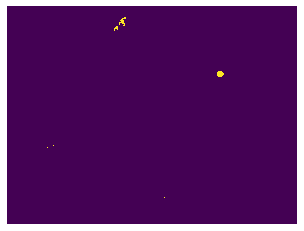

In [17]:
image_path = 'data/1.jpg'

img = read(image_path)
mask = create_ball_mask(img)
img = mark_object(img, mask)

cv2.imwrite('./obj-detected.jpg', cv2.cvtColor(img, cv2.COLOR_RGB2BGR))
create_plot(create_ball_mask(img))

True False


<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.7/site-packages/matplotlib/pyplot.py'>

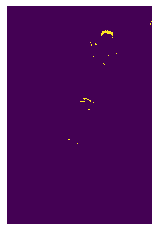

In [18]:
image_path = './data/selena.jpg'

img = read(image_path)

green_lower = (200, 180, 70)
green_upper = (255, 255, 175)
 
# construct a mask for the color "green", then perform
# a series of dilations and erosions to remove any small
# blobs left in the mask
mask = cv2.inRange(img, green_lower, green_upper)

print(mask.any(), mask.all())
create_plot(mask)

In [19]:
mask = cv2.erode(mask, None, iterations=2)
mask = cv2.dilate(mask, None, iterations=2)

## Reducing the Amount of Colors in an Image



The following code is taken from the example on http://scikit-learn.org/stable/auto_examples/cluster/plot_color_quantization.html#sphx-glr-auto-examples-cluster-plot-color-quantization-py

The process of reducing the number of distinct colors in an image is often called color quantization. The idea is to preserve the color appearance of an image and to reduce the number of colors, e.g. for compression.

You can make use of the Mean Shift algorithm from two lectures ago to perform color quantization. This will find you all of the 'most prominent' colors. However, the drawback is that the Mean Shift algorithm has exponential runtime, which makes it unsuitable for color quantization in bigger images.

There is a nice tutorial on http://www.pyimagesearch.com/2014/07/07/color-quantization-opencv-using-k-means-clustering/

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
from time import time


def apply_kmeans(image, n_colors=16):
    # Convert to floats instead of the default 8 bits integer coding. Dividing by
    # 255 is important so that plt.imshow behaves works well on float data (need to
    # be in the range [0-1])
    image = np.array(image, dtype=np.float64) / 255

    # Load Image and transform to a 2D numpy array.
    w, h, d = image.shape
    assert d == 3
    image_array = np.reshape(image, (w * h, d))

    print("Fitting model on a small sub-sample of the data")
    t0 = time()
    image_array_sample = shuffle(image_array, random_state=0)[:1000]
    kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)
    print("done in %0.3fs." % (time() - t0))

    # Get labels for all points
    print("Predicting color indices on the full image (k-means)")
    t0 = time()
    labels = kmeans.predict(image_array)
    print("done in %0.3fs." % (time() - t0))
    
    return labels, kmeans.cluster_centers_, w, h


def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    d = codebook.shape[1]
    image = np.zeros((w, h, d))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image

In [21]:

n_colors = 16

image_path = 'data/mare-08.jpg'
image = read(image_path)  # load_sample_image("china.jpg")
labels, cluster_centers, w, h = apply_kmeans(image, n_colors=n_colors)
quant_image = recreate_image(cluster_centers, labels, w, h)

print(image.shape)


Fitting model on a small sub-sample of the data
done in 0.168s.
Predicting color indices on the full image (k-means)
done in 0.180s.
(768, 1024, 3)


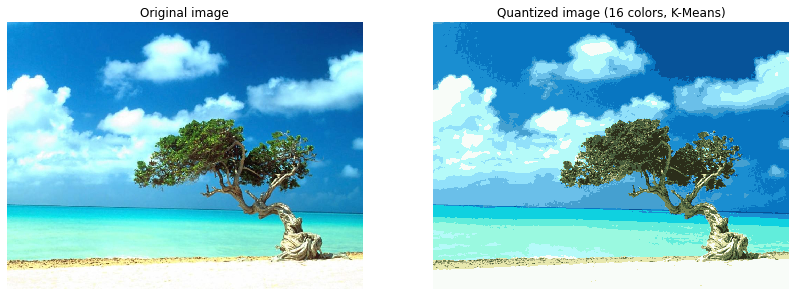

In [22]:
plt.figure(figsize=(14, 7))
plt.clf()
plt.axis('off')

plt.subplot(1, 2, 1)
plt.title('Original image')
plt.axis('off')
plt.imshow(image, interpolation='none')

plt.subplot(1, 2, 2)
plt.title('Quantized image ({} colors, K-Means)'.format(n_colors))
plt.axis('off')
plt.imshow(quant_image, interpolation='none')
plt.show()

# Color Quantization and Color Replacement

Let's do a bit of art. Say we have a modern photo and we want to make it appear as back in the days on a Commodore 64.
Similar to this: http://realstuffforabstractpeople.com/retrofyme/


![](http://www.nightfallcrew.com/wp-content/gallery/industrial_dawn_demo/industrial_dawn_demo_0.png)

Consequently, since the C64 can only display 16 colors, we could write a small program, which applies color quantization as above and subsequently, we find the nearest color in the C64 color palette, see https://en.wikipedia.org/wiki/List_of_color_palettes.


100%|██████████| 320/320 [00:17<00:00, 17.89it/s]


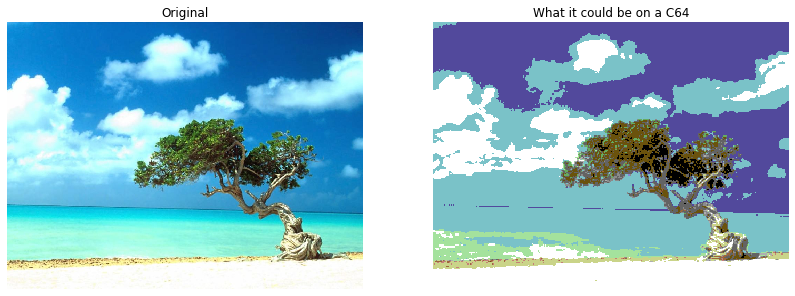

In [23]:
from tqdm import tqdm
from scipy.spatial import distance


def _c64_colors():
    # From https://upload.wikimedia.org/wikipedia/commons/6/65/Commodore64_palette.png
    # with Seashore, The 16 C64 colors
    black = [0, 0, 0]
    white = [255, 255, 255]
    red = [154, 76, 67]
    cyan = [122, 194, 200]
    purple = [157, 90, 165]
    green = [103, 171, 95]
    blue = [82, 73, 156]
    yellow = [202, 212, 137]
    a = [156, 103, 58]
    b = [106, 82, 12]
    c = [197, 126, 119]
    d = [99, 99, 99]
    e = [139, 139, 139]
    f = [164, 226, 157]
    g = [139, 130, 205]
    hc = [175, 175, 175]

    c64_colors = [black, white, red, cyan, purple, green, blue, yellow, 
                  a, b, c, d, e, f, g, hc]
    return c64_colors


def _get_closest_c64_color(value):
    dst = 200000
    for color in _c64_colors():
        new_dst = distance.euclidean(color, value)
        if new_dst < dst:
            dst = new_dst
            return_color = color
    return return_color


def to_c64_colors(image):
    """
    image:
        A 3d numpy array
    """
    c64_img = np.copy(image)
    h, w, _ = c64_img.shape
    
    for x in tqdm(range(w)):
        for y in range(h):
            c64_img[y, x] = _get_closest_c64_color(c64_img[y, x])
    # [[_get_closest_c64_color(c64_img[y, x]) for y in range(h)] for x in range(w)]
    return c64_img


small_image = resize(image, 320)
c64_image = to_c64_colors(small_image)

plt.figure(figsize=(14, 7))
plt.clf()
plt.axis('off')

plt.subplot(1, 2, 1)
plt.title('Original'.format(n_colors))
plt.axis('off')
plt.imshow(image, interpolation='none')

plt.subplot(1, 2, 2)
plt.title('What it could be on a C64'.format(n_colors))
plt.axis('off')
plt.imshow(c64_image, interpolation='none')
plt.show()

##  Finding Nearest-neighbours with KD-Trees

As you can see, the naive implementation above is quite slow. We could speed it up, by first apply a color 

However, we can also make use of a KD-Tree containing the "nearest" colors.

See:
  * https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.KDTree.html
  * https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.cKDTree.html
  * https://en.wikipedia.org/wiki/K-d_tree

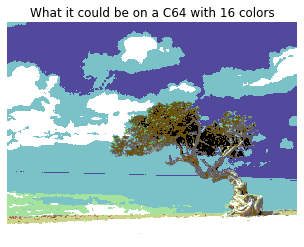

In [24]:
import scipy.spatial as sp



def create_tree(colors):
    tree = sp.cKDTree(colors)  # creating kd-tree from C64 colors
    return tree


def query_tree(small_image, tree):
    h, w, d = small_image.shape
    small_image_lst = small_image.reshape(h * w, d)
    distance, result = tree.query(small_image_lst)  # get Euclidean distance and index of each C64 color in tree

    for idx, c in enumerate(_c64_colors()):
        small_image_lst[result == idx] = c
    return small_image_lst.reshape(h, w, d)


tree = create_tree(_c64_colors())
small_image_lst = query_tree(small_image, tree)      

plt.title('What it could be on a C64 with {} colors'.format(n_colors))
plt.axis('off')
plt.imshow(small_image_lst, interpolation='none')
plt.show()

In [25]:
%%timeit 
small_image_lst = query_tree(small_image, tree)      

18.3 ms ± 259 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
